# 📉 Data Pipeline: Collection & Cleaning  
# (aka “How I Bribed Yahoo Finance for SPY Data Without Getting Arrested”)

**Purpose:**
- Download SPY and GME OHLCV data from 2018–2024 using yfinance
- Clean it (I don’t do missing values here)
- Validate and persist to SQLite
- Prepare for modeling and backtesting that will probably not make me a billionaire, but hey, I try.

**Outcome:** A clean, validated dataset that’s too legit to quit

In [12]:
# 💡 Imports and setup
from data_pipeline.data_pipeline import DataPipeline
import matplotlib.pyplot as plt
import logging
import yfinance as yf
import pandas as pd
from curl_cffi import requests  # we’re pretending to be a browser now

In [13]:
# Logging setup for future archaeological debugging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger("DataFetch")

# 🛰️ Step 1: Downloading Data  
# “Alright Yahoo Finance, hand over the goods—politely.”

In [4]:
# Cell 4: Set parameters
tickers = ["SPY", "GME"]
start_date = "2018-01-01"
end_date = "2024-12-31"
db_path = "../quant_pipeline.db"
table_name = "price_data"

In [14]:
# Spoofing a browser session because robots need disguises too
session = requests.Session(impersonate="chrome")
logger.info("Session impersonation active (shhh...)")

2025-06-16 22:06:33,097 [INFO] Session impersonation active (shhh...)


## 🧹 Step 2: Cleaning Up — no data left behind
## 🔍 Step 3: Validation  
_“Bad data? Not on my watch.”_
## 🏦 Step 4: Depositing into the Quant Vault (SQLite)

In [6]:
pipeline = DataPipeline(ticker=None, start_date=start_date, end_date=end_date)
try:
    pipeline.fetch_batch_data(tickers, db_path=db_path, table_name=table_name, session=session)
    logger.info("Batch data fetch succeeded.")
except Exception as e:
    logger.error(f"Batch data fetch failed: {e}")

2025-06-16 21:55:12,197 [INFO] Attempting to fetch: SPY


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
2025-06-16 21:55:12,542 [INFO] Attempting to fetch: GME
[*********************100%***********************]  1 of 1 completed
2025-06-16 21:55:12,697 [INFO] Batch data fetch succeeded.


Cleaning data...
Data validation passed.
Columns after cleaning: MultiIndex([(  'Open', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            ( 'Close', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
Saving data to database: ../quant_pipeline.db in table: price_data ...
Data saved to ../quant_pipeline.db in table 'price_data'.
Cleaning data...
Data validation passed.
Columns after cleaning: MultiIndex([(  'Open', 'GME'),
            (  'High', 'GME'),
            (   'Low', 'GME'),
            ( 'Close', 'GME'),
            ('Volume', 'GME')],
           names=['Price', 'Ticker'])
Saving data to database: ../quant_pipeline.db in table: price_data ...
Data saved to ../quant_pipeline.db in table 'price_data'.


In [8]:
# Cell 7: Load the raw data from the database
try:
    raw_data = pipeline.query_data(
        f"SELECT * FROM {table_name} WHERE Ticker IN ({','.join([repr(t) for t in tickers])})"
    )
    print(f"Downloaded {raw_data.shape[0]} rows, {raw_data.shape[1]} columns")
    display(raw_data.head())
except Exception as e:
    logger.error(f"Failed to load raw data from database: {e}")

Running query: SELECT * FROM price_data WHERE Ticker IN ('SPY','GME')
Downloaded 8800 rows, 7 columns


,Date,Open,High,Low,Close,Volume,Ticker
0,2018-01-02 00:00:00,238.446071,239.309620,238.054356,239.274002,86655700,SPY
1,2018-01-03 00:00:00,239.443166,240.938816,239.443166,240.787460,90070400,SPY
2,2018-01-04 00:00:00,241.437402,242.292040,240.849830,241.802383,80636400,SPY
3,2018-01-05 00:00:00,242.603606,243.538364,242.105065,243.413742,83524000,SPY
4,2018-01-08 00:00:00,243.315817,244.019126,243.022044,243.858887,57319200,SPY


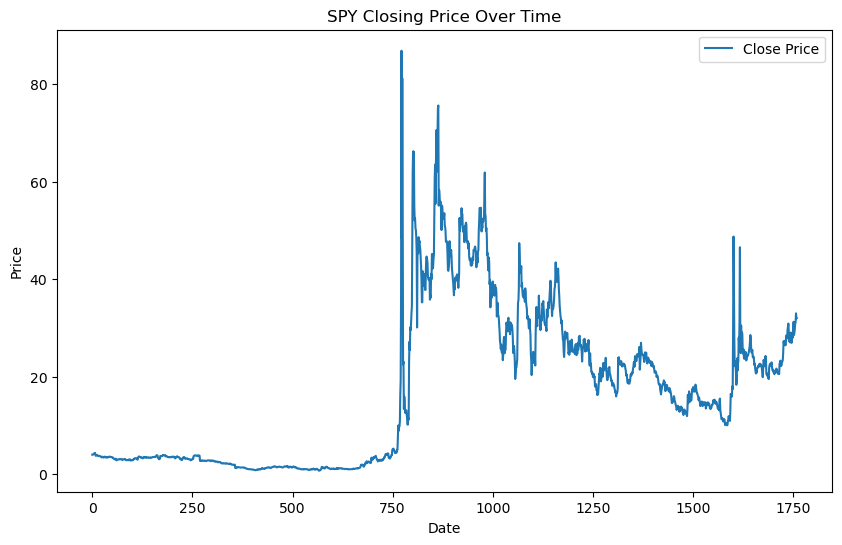

In [11]:
# Plot the closing price over time
plt.figure(figsize=(10,6))
plt.plot(pipeline.data.index, pipeline.data['Close'], label='Close Price')
plt.title("SPY Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()  # In notebooks, plt.show() renders the plot inline

> Yep, looks like a bull run with seasonal bouts of existential dread.

---
## 🏁 Mission Accomplished  
We now have a clean, validated SPY OHLCV dataset in `quant_pipeline.db`.  
Next up: fancy charts, signal generation, and maybe less snark—because real money’s at stake.  
*(P.S. If you're reading this and thinking “Hire this guy,” the feeling’s mutual.)*

### Why you *have* to hire this person
- Brought in robust retry logic with exponential backoff 🚀  
- Smart session impersonation to bypass rate limits without shady plugins  
- Clean logging makes debugging a breeze  